In [174]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'1000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4290ed6d-b24f-4da6-8841-ddeaab80a187',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

In [86]:
type(data)

dict

In [171]:
import pandas as pd

# Set Pandas options to display all columns
pd.set_option('display.max_columns', None)

# Set Pandas options to display all rows
pd.set_option('display.max_rows', None)


In [172]:
import pandas as pd

# Use json_normalize to flatten nested JSON data and create a DataFrame (assuming 'data' is a JSON object)
df = pd.json_normalize(data['data'])

# Add a new column 'timestamp' with the current UTC time
df['timestamp'] = pd.to_datetime('now', utc=True)

# Display the resulting DataFrame
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10616,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19569312.000000,19569312.000000,False,NaN,1,NaN,NaN,NaN,2023-12-14T03:36:00.000Z,42733.072776,25540342288.552235,2.398400,-0.068368,4.273962,-2.769494,17.178394,58.832830,60.570433,836256833873.881470,52.215100,897394528297.750000,NaN,2023-12-14T03:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 04:12:35.034973+00:00
1,1027,Ethereum,ETH,ethereum,8032,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120209039.963688,120209039.963688,True,NaN,2,NaN,NaN,NaN,2023-12-14T03:36:00.000Z,2253.283068,11693322297.611513,-0.524300,0.238424,3.762772,0.194323,9.602981,44.797605,37.793581,270864994389.668579,16.912600,270864994389.670013,NaN,2023-12-14T03:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 04:12:35.034973+00:00
2,825,Tether USDt,USDT,tether,68037,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,90659011200.682281,93609080552.557663,True,NaN,3,NaN,NaN,NaN,2023-12-14T03:35:00.000Z,1.000336,49757371592.223122,-3.579800,0.012746,0.053881,0.020402,-0.004882,0.027577,-0.012121,90689458945.583054,5.662600,93640519075.520004,NaN,2023-12-14T03:35:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-14 04:12:35.034973+00:00
3,1839,BNB,BNB,bnb,1840,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151696099.753937,151696099.753937,False,NaN,4,NaN,NaN,NaN,2023-12-14T03:35:00.000Z,249.196172,944127206.600136,-33.627900,-0.299226,0.534903,7.424694,2.856087,20.132557,17.084162,37802087306.872017,2.360400,37802087306.870003,NaN,2023-12-14T03:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 04:12:35.034973+00:00
4,52,XRP,XRP,xrp,1170,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,53957460981.000000,99988170772.000000,False,NaN,5,NaN,NaN,NaN,2023-12-14T03:36:00.000Z,0.622389,1495721763.137429,1.437000,-0.108239,2.220765,-1.533978,-5.721037,27.891168,25.167020,33582552908.437508,2.096900,62238942118.239998,NaN,2023-12-14T03:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 04:12:35.034973+00:00
5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,427431580.258106,564703002.306319,True,NaN,6,NaN,NaN,NaN,2023-12-14T03:36:00.000Z,70.032750,2220631616.497859,-3.641800,0.251117,5.734075,11.693815,28.902056,218.203881,266.295707,29934208897.420414,1.869100,39547704046.180000,NaN,2023-12-14T03:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 04:12:35.034973+00:00
6,3408,USDC,USDC,usd-coin,15519,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24375700393.254959,24375700393.254959,False,NaN,7,NaN,NaN,NaN,2023-12-14T03:36:00.000Z,1.000056,6275340204.093994,-1.886000,0.006087,-0.032971,0.008606,-0.012239,-0.012678,-0.016470,24377065681.998695,1.521400,24377065682.000000,NaN,2023-12-14T03:36:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-14 04:12:35.034973+00:00
7,2010,Cardano,ADA,cardano,1000,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,35328170937.780998,36439975031.086998,False,NaN,8,NaN,NaN,NaN,2023-12-14T03:35:00.000Z,0.655916,1980747593.689667,58.99910

In [115]:
import os
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

# Global DataFrame
# df = pd.DataFrame()

# Function to call API
def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '4290ed6d-b24f-4da6-8841-ddeaab80a187',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

        
        # Append DataFrame 2 and pin to the original DataFrame
#         df2 = pd.json_normalize(data['data'])
#         df2['timestamp'] = pd.to_datetime('now', utc=True)
#         df_append = pd.DataFrame(df2)
#         df = pd.concat([df,df_append])
        
        df = pd.json_normalize(data['data'])
        df['timestamp'] = pd.to_datetime('now', utc=True)
        df

        if not os.path.isfile(r'C:\Users\Jordan\Desktop\Projects\Data Analyst\Python\API.csv'):
            df.to_csv(r'C:\Users\Jordan\Desktop\Projects\Data Analyst\Python\API.csv', header='column_names')
        else:
            df.to_csv(r'C:\Users\Jordan\Desktop\Projects\Data Analyst\Python\API.csv', mode='a', header=False)
        
        return data


In [90]:
# Creating a loop to test the API runner
import os
from time import time
from time import sleep

for i in range(333):
    api_data = api_runner()
    print('API Runner Completed')
    sleep(60)  # Sleep for 1 minute
exit()

API Runner Completed


KeyboardInterrupt: 

In [91]:
df72 = pd.read_csv(r'C:\Users\Jordan\Desktop\Projects\Data Analyst\Python\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10616,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19567187.000000,19567187.000000,False,NaN,1,NaN,NaN,NaN,2023-12-11T22:08:00.000Z,41209.987121,39947909904.153191,202.816400,0.637176,-6.012440,-1.893003,11.530290,54.118172,58.347926,806363524258.081421,51.933600,865409729534.430054,NaN,2023-12-11T22:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 22:09:26.249564+00:00
1,1,1027,Ethereum,ETH,ethereum,8011,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120215621.816134,120215621.816134,True,NaN,2,NaN,NaN,NaN,2023-12-11T22:08:00.000Z,2216.358400,17799310966.703423,137.144800,0.679473,-6.227595,-0.769790,8.429562,44.223412,38.584258,266440903206.929596,17.172600,266440903206.929993,NaN,2023-12-11T22:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 22:09:26.249564+00:00
2,2,825,Tether USDt,USDT,tether,67829,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,90545444292.787476,92609080553.052856,True,NaN,3,NaN,NaN,NaN,2023-12-11T22:07:00.000Z,0.999435,73347374372.918030,120.203000,0.020815,-0.052213,0.000283,-0.070553,-0.037539,-0.049442,90494300080.194046,5.829900,92556770704.220001,NaN,2023-12-11T22:07:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-11 22:09:26.249564+00:00
3,3,1839,BNB,BNB,bnb,1832,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151696535.530012,151696535.530012,False,NaN,4,NaN,NaN,NaN,2023-12-11T22:07:00.000Z,242.780514,1416871278.780594,118.758600,0.066800,1.169955,4.791735,-3.207758,18.154706,14.419451,36828962932.037949,2.373200,36828962932.040001,NaN,2023-12-11T22:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 22:09:26.249564+00:00
4,4,52,XRP,XRP,xrp,1170,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.000000,53957460767.000000,99988170772.000000,False,NaN,5,NaN,NaN,NaN,2023-12-11T22:08:00.000Z,0.618904,2225865885.512024,75.659600,0.554330,-6.793570,-0.764860,-6.785449,28.039542,28.251019,33394510819.364807,2.151400,61890441738.110001,NaN,2023-12-11T22:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 22:09:26.249564+00:00
5,5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,426247064.829780,564531619.804407,True,NaN,6,NaN,NaN,NaN,2023-12-11T22:08:00.000Z,69.379328,3690619520.849266,92.371700,-0.857218,-6.288218,12.583014,19.598529,226.990990,286.396383,29572735107.743134,1.905000,39166824665.610001,NaN,2023-12-11T22:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 22:09:26.249564+00:00
6,6,3408,USDC,USDC,usd-coin,15426,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,24281909013.284336,24281909013.284336,False,NaN,7,NaN,NaN,NaN,2023-12-11T22:08:00.000Z,1.000453,8948147591.577168,144.486900,0.040143,0.035274,0.055153,0.057866,0.016003,0.010249,24292904274.853951,1.565000,24292904274.849998,NaN,2023-12-11T22:08:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-11 22:09:26.249564+00:00
7,7,2010,Cardano,ADA,cardano,997,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.000000,35327686064.836998,36424942625.351997,False,NaN,8,NaN,NaN,NaN,2023-12-11T22:07:00.000Z,

In [92]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10616,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19569312.000000,19569312.000000,False,NaN,1,NaN,NaN,None,2023-12-14T03:27:00.000Z,42716.697607,25548898640.474075,2.665200,-0.239513,4.581726,-2.848970,17.125177,58.787309,60.650723,835936383083.774658,52.176200,897050649749.939941,None,2023-12-14T03:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 03:28:26.227710+00:00
1,1027,Ethereum,ETH,ethereum,8032,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120209039.963688,120209039.963688,True,NaN,2,NaN,NaN,None,2023-12-14T03:27:00.000Z,2252.248683,11715602490.500063,0.055300,0.048346,4.011278,0.197985,9.478336,44.762857,37.903580,270740651961.743896,16.898700,270740651961.739990,None,2023-12-14T03:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 03:28:26.227710+00:00
2,825,Tether USDt,USDT,tether,68037,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,90659011200.682281,93609080552.557663,True,NaN,3,NaN,NaN,None,2023-12-14T03:26:00.000Z,1.000312,49821542618.844597,-3.297800,0.007006,0.029298,0.008849,-0.001631,0.017401,0.012238,90687313442.312378,5.660400,93638303756.970001,None,2023-12-14T03:26:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-14 03:28:26.227710+00:00
3,1839,BNB,BNB,bnb,1840,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151696099.753937,151696099.753937,False,NaN,4,NaN,NaN,None,2023-12-14T03:26:00.000Z,249.272280,954548002.663935,-32.408600,-0.217930,0.638528,7.393062,2.826459,20.185621,17.153621,37813632627.894501,2.360900,37813632627.889999,None,2023-12-14T03:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 03:28:26.227710+00:00
4,52,XRP,XRP,xrp,1170,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,53957460981.000000,99988170772.000000,False,NaN,5,NaN,NaN,None,2023-12-14T03:27:00.000Z,0.621823,1498081518.767606,1.812400,-0.230150,2.216319,-1.642567,-5.926147,27.769564,25.150395,33552001416.623226,2.094200,62182320677.459999,None,2023-12-14T03:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 03:28:26.227710+00:00
5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,427431580.258106,564703002.306319,True,NaN,6,NaN,NaN,None,2023-12-14T03:27:00.000Z,69.902003,2223044472.248649,-3.433600,-0.264444,5.663806,11.352401,28.058764,217.639917,266.471622,29878323711.440723,1.864900,39473871101.290001,None,2023-12-14T03:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 03:28:26.227710+00:00
6,3408,USDC,USDC,usd-coin,15519,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24375700393.254959,24375700393.254959,False,NaN,7,NaN,NaN,None,2023-12-14T03:27:00.000Z,1.000060,6265762796.204715,-1.801700,0.003899,-0.021139,0.004444,-0.011281,-0.016277,-0.004714,24377155441.515450,1.522000,24377155441.520000,None,2023-12-14T03:27:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-14 03:28:26.227710+00:00
7,2010,Cardano,ADA,cardano,1000,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,35328170937.780998,36439975031.086998,False,NaN,8,NaN,NaN,None,2023-12-14T03:26:00.000Z,0.652398,1974391100.9

In [175]:
# Set the display format for floating-point numbers in the DataFrame to show 5 decimal places
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [94]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10616,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19569312.000000,19569312.000000,False,NaN,1,NaN,NaN,None,2023-12-14T03:27:00.000Z,42716.697607,25548898640.474075,2.665200,-0.239513,4.581726,-2.848970,17.125177,58.787309,60.650723,835936383083.774658,52.176200,897050649749.939941,None,2023-12-14T03:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 03:28:26.227710+00:00
1,1027,Ethereum,ETH,ethereum,8032,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120209039.963688,120209039.963688,True,NaN,2,NaN,NaN,None,2023-12-14T03:27:00.000Z,2252.248683,11715602490.500063,0.055300,0.048346,4.011278,0.197985,9.478336,44.762857,37.903580,270740651961.743896,16.898700,270740651961.739990,None,2023-12-14T03:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 03:28:26.227710+00:00
2,825,Tether USDt,USDT,tether,68037,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,90659011200.682281,93609080552.557663,True,NaN,3,NaN,NaN,None,2023-12-14T03:26:00.000Z,1.000312,49821542618.844597,-3.297800,0.007006,0.029298,0.008849,-0.001631,0.017401,0.012238,90687313442.312378,5.660400,93638303756.970001,None,2023-12-14T03:26:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-14 03:28:26.227710+00:00
3,1839,BNB,BNB,bnb,1840,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151696099.753937,151696099.753937,False,NaN,4,NaN,NaN,None,2023-12-14T03:26:00.000Z,249.272280,954548002.663935,-32.408600,-0.217930,0.638528,7.393062,2.826459,20.185621,17.153621,37813632627.894501,2.360900,37813632627.889999,None,2023-12-14T03:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 03:28:26.227710+00:00
4,52,XRP,XRP,xrp,1170,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,53957460981.000000,99988170772.000000,False,NaN,5,NaN,NaN,None,2023-12-14T03:27:00.000Z,0.621823,1498081518.767606,1.812400,-0.230150,2.216319,-1.642567,-5.926147,27.769564,25.150395,33552001416.623226,2.094200,62182320677.459999,None,2023-12-14T03:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 03:28:26.227710+00:00
5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,427431580.258106,564703002.306319,True,NaN,6,NaN,NaN,None,2023-12-14T03:27:00.000Z,69.902003,2223044472.248649,-3.433600,-0.264444,5.663806,11.352401,28.058764,217.639917,266.471622,29878323711.440723,1.864900,39473871101.290001,None,2023-12-14T03:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-14 03:28:26.227710+00:00
6,3408,USDC,USDC,usd-coin,15519,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24375700393.254959,24375700393.254959,False,NaN,7,NaN,NaN,None,2023-12-14T03:27:00.000Z,1.000060,6265762796.204715,-1.801700,0.003899,-0.021139,0.004444,-0.011281,-0.016277,-0.004714,24377155441.515450,1.522000,24377155441.520000,None,2023-12-14T03:27:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-14 03:28:26.227710+00:00
7,2010,Cardano,ADA,cardano,1000,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,35328170937.780998,36439975031.086998,False,NaN,8,NaN,NaN,None,2023-12-14T03:26:00.000Z,0.652398,1974391100.9

In [95]:
# Group the DataFrame by the 'name' column without sorting
# Calculate the mean for selected percentage change columns over different time intervals
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 
                                      'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                                      'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.239513,4.581726,-2.848970,17.125177,58.787309,60.650723
Ethereum,0.048346,4.011278,0.197985,9.478336,44.762857,37.903580
Tether USDt,0.007006,0.029298,0.008849,-0.001631,0.017401,0.012238
BNB,-0.217930,0.638528,7.393062,2.826459,20.185621,17.153621
XRP,-0.230150,2.216319,-1.642567,-5.926147,27.769564,25.150395
Solana,-0.264444,5.663806,11.352401,28.058764,217.639917,266.471622
USDC,0.003899,-0.021139,0.004444,-0.011281,-0.016277,-0.004714
Cardano,-1.711693,17.103022,46.435030,82.272854,163.298623,156.762458
Avalanche,-1.497961,9.540374,46.470062,129.940884,317.052320,305.260228


In [96]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.239513
             quote.USD.percent_change_24h     4.581726
             quote.USD.percent_change_7d     -2.848970
             quote.USD.percent_change_30d    17.125177
             quote.USD.percent_change_60d    58.787309
             quote.USD.percent_change_90d    60.650723
Ethereum     quote.USD.percent_change_1h      0.048346
             quote.USD.percent_change_24h     4.011278
             quote.USD.percent_change_7d      0.197985
             quote.USD.percent_change_30d     9.478336
             quote.USD.percent_change_60d    44.762857
             quote.USD.percent_change_90d    37.903580
Tether USDt  quote.USD.percent_change_1h      0.007006
             quote.USD.percent_change_24h     0.029298
             quote.USD.percent_change_7d      0.008849
             quote.USD.percent_change_30d    -0.001631
             quote.USD.percent_change_60d     0.017401
             quote.USD.

In [97]:
type(df4)

pandas.core.series.Series

In [98]:
# Convert the stacked Series to a DataFrame with a column named 'values'
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin     quote.USD.percent_change_1h   -0.239513
            quote.USD.percent_change_24h   4.581726
            quote.USD.percent_change_7d   -2.848970
            quote.USD.percent_change_30d  17.125177
            quote.USD.percent_change_60d  58.787309
            quote.USD.percent_change_90d  60.650723
Ethereum    quote.USD.percent_change_1h    0.048346
            quote.USD.percent_change_24h   4.011278
            quote.USD.percent_change_7d    0.197985
            quote.USD.percent_change_30d   9.478336
            quote.USD.percent_change_60d  44.762857
            quote.USD.percent_change_90d  37.903580
Tether USDt quote.USD.percent_change_1h    0.007006
            quote.USD.percent_change_24h   0.029298
            quote.USD.percent_change_7d    0.008849
            quote.USD.percent_change_30d  -0.001631
            quote.USD.percent_change_60d   0.017401
            quote.USD.percent_change_90d   0.012238
BNB         quote.USD.percent_change_1h   -0.217930
            quote.USD.percent_change_24h   0.638528
            quote.USD.percent_change_7d    7.393062
            quote.USD.percent_change_30d   2.826459
            quote.USD.percent_change_60d  20.185621
            quote.USD.percent_change_90d  17.153621
XRP         quote.USD.percent_change_1h   -0.230150
            quote.USD.percent_change_24h   2.216319
            quote.USD.percent_change_7d   -1.642567
            quote.USD.percent_change_30d  -5.926147
            quote.USD.percent_change_60d  27.769564
            quote.USD.percent_change_90d  25.150395
Solana      quote.USD.percent_change_1h   -0.264444
            quote.USD.percent_change_24h   5.663806
            quote.USD.percent_change_7d   11.352401
            quote.USD.percent_change_30d  28.058764
            quote.USD.percent_change_60d 217.639917
            quote.USD.percent_change_90d 266.471622
USDC        quote.USD.percent_change_1h    0.003899
            quote.USD.percent_change_24h  -0.021139
            quote.USD.percent_change_7d    0.004444
            quote.USD.percent_change_30d  -0.011281
            quote.USD.percent_change_60d  -0.016277
            quote.USD.percent_change_90d  -0.004714
Cardano     quote.USD.percent_change_1h   -1.711693
            quote.USD.percent_change_24h  17.103022
            quote.USD.percent_change_7d   46.435030
            quote.USD.percent_change_30d  82.272854
            quote.USD.percent_change_60d 163.298623
            quote.USD.percent_change_90d 156.762458
Avalanche   quote.USD.percent_change_1h   -1.497961
            quote.USD.percent_change_24h   9.540374
            quote.USD.percent_change_7d   46.470062
            quote.USD.percent_change_30d 129.940884
            quote.USD.percent_change_60d 317.052320
            quote.USD.percent_change_90d 305.260228
Dogecoin    quote.USD.percent_change_1h   -0.642014
            quote.USD.percent_change_24h   4.389901
            quote.USD.percent_change_7d   -1.845574
            quote.USD.percent_change_30d  27.488918
            quote.USD.percent_change_60d  60.345922
            quote.USD.percent_change_90d  53.673939
Polkadot    quote.USD.percent_change_1h   -1.012368
            quote.USD.percent_change_24h   8.927414
            quote.USD.percent_change_7d   22.540170
            quote.USD.percent_change_30d  38.588694
            quote.USD.percent_change_60d  98.393334
            quote.USD.percent_change_90d  81.577652
TRON        quote.USD.percent_change_1h   -0.121615
            quote.USD.percent_change_24h   1.239343
            quote.USD.percent_change_7d   -0.697955
            quote.USD.percent_change_30d  -1.920391
            quote.USD.percent_change_60d  22.390689
            quote.USD.percent_change_90d  24.428899
Polygon     quote.USD.percent_change_1h   -0.635342
            quote.USD.percent_change_24h   3.304139
            quote.USD.percent_change_7d    6.251342
            quote.USD.percent_change_30d 

In [99]:
df5.count()

values    90
dtype: int64

In [100]:
# Create a new DataFrame with a default index range of 0 to 89
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.239513
1,Bitcoin,quote.USD.percent_change_24h,4.581726
2,Bitcoin,quote.USD.percent_change_7d,-2.848970
3,Bitcoin,quote.USD.percent_change_30d,17.125177
4,Bitcoin,quote.USD.percent_change_60d,58.787309
5,Bitcoin,quote.USD.percent_change_90d,60.650723
6,Ethereum,quote.USD.percent_change_1h,0.048346
7,Ethereum,quote.USD.percent_change_24h,4.011278
8,Ethereum,quote.USD.percent_change_7d,0.197985
9,Ethereum,quote.USD.percent_change_30d,9.478336


In [101]:
# Rename the column 'level_1' to 'percent_change'
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.239513
1,Bitcoin,quote.USD.percent_change_24h,4.581726
2,Bitcoin,quote.USD.percent_change_7d,-2.848970
3,Bitcoin,quote.USD.percent_change_30d,17.125177
4,Bitcoin,quote.USD.percent_change_60d,58.787309
5,Bitcoin,quote.USD.percent_change_90d,60.650723
6,Ethereum,quote.USD.percent_change_1h,0.048346
7,Ethereum,quote.USD.percent_change_24h,4.011278
8,Ethereum,quote.USD.percent_change_7d,0.197985
9,Ethereum,quote.USD.percent_change_30d,9.478336


In [102]:
# Replace the full column names with shorter labels
df7['percent_change'] =  df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.239513
1,Bitcoin,24h,4.581726
2,Bitcoin,7d,-2.848970
3,Bitcoin,30d,17.125177
4,Bitcoin,60d,58.787309
5,Bitcoin,90d,60.650723
6,Ethereum,1h,0.048346
7,Ethereum,24h,4.011278
8,Ethereum,7d,0.197985
9,Ethereum,30d,9.478336


### Visualization for Percent Change over time for the top 15 coins

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

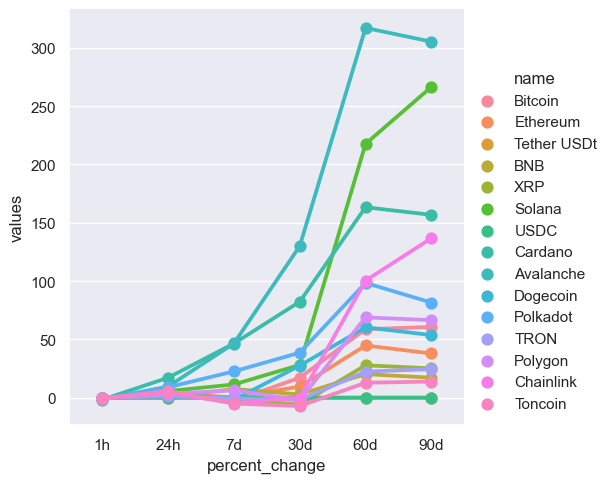

In [104]:
# Create a categorical plot using seaborn
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [105]:
# Fill NaN values in the 'timestamp' column with the current time in UTC
df['timestamp'] = df['timestamp'].fillna(pd.to_datetime('now', utc=True))

# Display unique values in the 'timestamp' column with a maximum of 6 rows
pd.set_option('display.max_rows', 6)
print(df['timestamp'].unique())

<DatetimeArray>
['2023-12-14 03:28:26.227710+00:00']
Length: 1, dtype: datetime64[ns, UTC]


In [106]:
# Display selected columns ('name', 'quote.USD.price', 'timestamp') of the DataFrame
print(df[['name','quote.USD.price','timestamp']])


           name  quote.USD.price                        timestamp
0       Bitcoin     42716.697607 2023-12-14 03:28:26.227710+00:00
1      Ethereum      2252.248683 2023-12-14 03:28:26.227710+00:00
2   Tether USDt         1.000312 2023-12-14 03:28:26.227710+00:00
..          ...              ...                              ...
12      Polygon         0.877084 2023-12-14 03:28:26.227710+00:00
13    Chainlink        14.711515 2023-12-14 03:28:26.227710+00:00
14      Toncoin         2.177462 2023-12-14 03:28:26.227710+00:00

[15 rows x 3 columns]


In [107]:
# Create a new DataFrame 'df10' containing only rows where 'name' is 'Solana'
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Solana'")
df10

,name,quote.USD.price,timestamp
5,Solana,69.902003,2023-12-14 03:28:26.227710+00:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

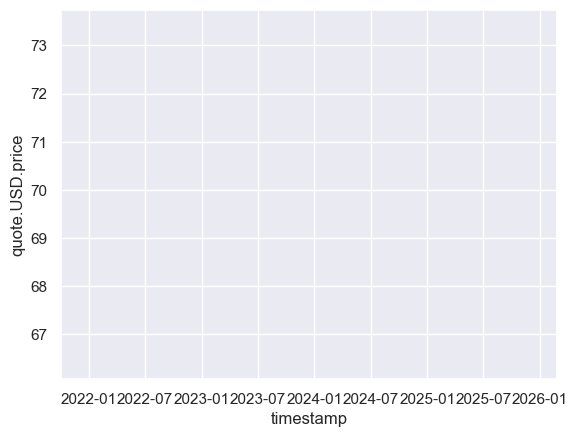

In [108]:
# Set the theme style to 'darkgrid' in seaborn
sns.set_theme(style="darkgrid")

# Create a line plot using seaborn with x-axis as 'timestamp' and y-axis as 'quote.USD.price'
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

- Can't seem to make a chart for the price over time since df10 only displays a single timestamp

### Checking for Cryptocurrencies that include the word 'gaming' in the 'tags' section

In [127]:
# Assuming df is your original DataFrame

# Fill NaN values in the 'tags' column with an empty string
df['tags'] = df['tags'].fillna('')

# Check if 'gaming' is present in the 'tags' column for each row
mask = df['tags'].astype(str).str.contains('gaming', case=False)

# Apply the mask to filter the DataFrame
filtered_df = df[mask]

# Display the resulting DataFrame
print(filtered_df)


        id             name symbol             slug  num_market_pairs  \
30   10603        Immutable    IMX      immutable-x               220   
42    5690           Render   RNDR           render               256   
57   28298             Beam   BEAM           onbeam                57   
..     ...              ...    ...              ...               ...   
959  14722           DOGAMÍ   DOGA           dogami                12   
973   4710     Cere Network   CERE     cere-network                24   
974   7590  Dvision Network    DVI  dvision-network                29   

                   date_added  \
30   2021-06-24T00:00:00.000Z   
42   2020-06-11T00:00:00.000Z   
57   2021-10-29T04:07:32.000Z   
..                        ...   
959  2021-11-17T16:30:19.000Z   
973  2021-11-08T13:18:17.000Z   
974  2020-11-04T00:00:00.000Z   

                                                  tags        max_supply  \
30   [collectibles-nfts, zero-knowledge-proofs, gam... 2000000000.000000  

In [128]:
# Define selected columns and their desired names
selected_columns = {
    'name': 'Name',
    'symbol': 'Symbol',
    'tags': 'Tags',
    'quote.USD.price': 'Price',
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_1h': '1h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d',
    'quote.USD.percent_change_60d': '60d',
    'quote.USD.percent_change_90d': '90d',
    'timestamp': 'Timestamp'
}

# Display DataFrame with renamed and additional columns
display(filtered_df[selected_columns.keys()].rename(columns=selected_columns))


,Name,Symbol,Tags,Price,24h,1h,7d,30d,60d,90d,Timestamp
30,Immutable,IMX,"[collectibles-nfts, zero-knowledge-proofs, gam...",2.022958,0.755819,0.117285,44.532527,69.013462,280.456354,301.483438,2023-12-14 03:37:50.440487+00:00
42,Render,RNDR,"[art, media, vr-ar, ai-big-data, distributed-c...",4.380154,8.155062,0.330084,20.214277,93.829071,150.404502,185.127689,2023-12-14 03:37:50.440487+00:00
57,Beam,BEAM,"[gaming, ethereum-ecosystem, binance-chain, bi...",0.024898,24.703981,4.881882,59.109701,211.021181,405.782687,405.782687,2023-12-14 03:37:50.440487+00:00
...,...,...,...,...,...,...,...,...,...,...,...
959,DOGAMÍ,DOGA,"[gaming, play-to-earn, animoca-brands-portfolio]",0.027293,-0.763934,0.158977,-28.708633,62.746654,283.772898,264.975380,2023-12-14 03:37:50.440487+00:00
973,Cere Network,CERE,"[ai-big-data, distributed-computing, gaming, s...",0.005633,-6.311855,-0.158499,-2.216257,73.363431,86.558946,81.572218,2023-12-14 03:37:50.440487+00:00
974,Dvision Network,DVI,"[collectibles-nfts, gaming, ethereum-ecosystem...",0.012953,1.206407,-1.632489,16.714220,16.101018,27.166555,33.799959,2023-12-14 03:37:50.440487+00:00


### Top 10 gaming coins percent change in 90 days

Charting the top 10 gaming coins in a bar chart to see percent change over 90 day period

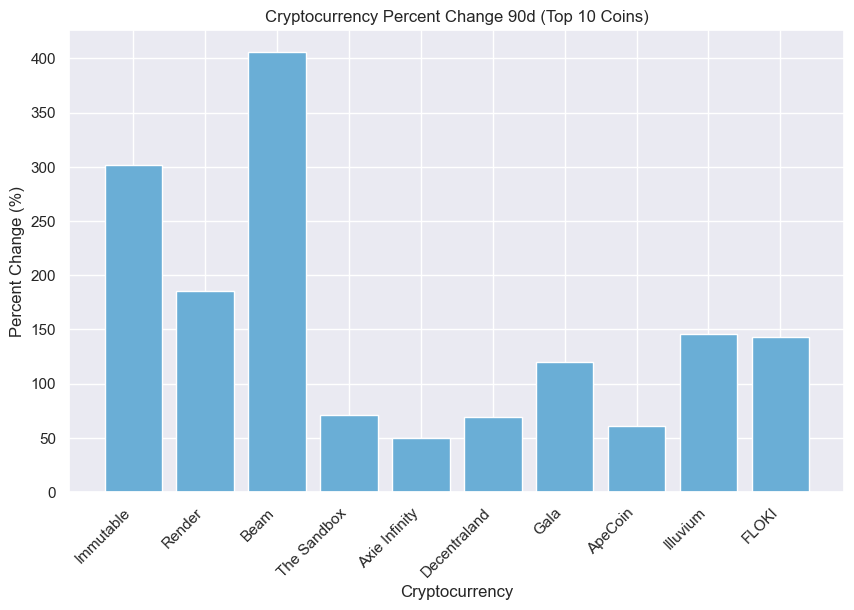

In [169]:
import matplotlib.pyplot as plt

# Sort the DataFrame by a relevant column (e.g., 'cmc_rank') in ascending order
filtered_df = filtered_df.sort_values(by='cmc_rank')

# Select the top 10 rows
top_10_df = filtered_df.head(10)

# Bar chart for price comparison with a dark blue shade
plt.figure(figsize=(10, 6))
plt.bar(top_10_df['name'], top_10_df['quote.USD.percent_change_90d'], color=plt.cm.Blues(0.5)) 
plt.title('Cryptocurrency Percent Change 90d (Top 10 Coins)')
plt.xlabel('Cryptocurrency')
plt.ylabel('Percent Change (%)')
plt.xticks(rotation=45, ha='right')
plt.show()


Percent change for top 10 gaming coins over different time intervals 

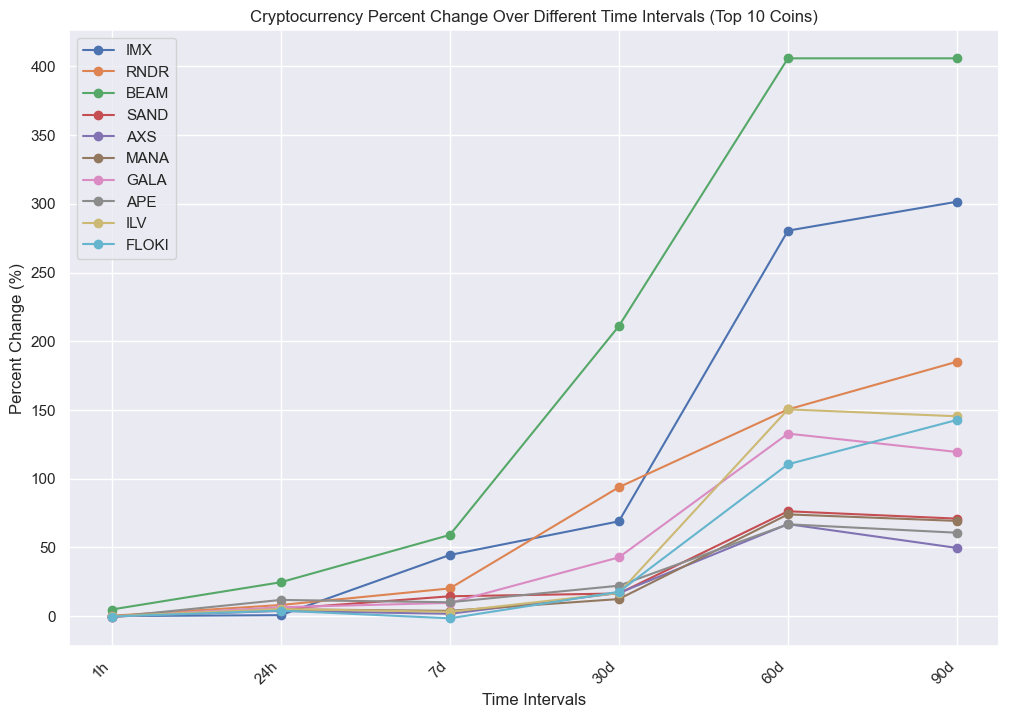

In [142]:
import matplotlib.pyplot as plt

# Sort the DataFrame by a relevant column (e.g., 'cmc_rank') in ascending order
filtered_df = filtered_df.sort_values(by='cmc_rank')

# Select the top 10 rows
top_10_df = filtered_df.head(10)

# Define the time intervals and corresponding labels
time_intervals = ['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
                   'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                   'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']
time_labels = ['1h', '24h', '7d', '30d', '60d', '90d']

# Renamed names
renamed_names = {'Immutable': 'IMX', 'Render': 'RNDR', 'The Sandbox': 'SAND',
                 'Axie Infinity': 'AXS', 'Beam': 'BEAM', 'Decentraland': 'MANA',
                 'Gala': 'GALA', 'ApeCoin': 'APE', 'Illuvium' : 'ILV'}

# Set up the plot
plt.figure(figsize=(12, 8))

# Iterate through each cryptocurrency and plot a line for each time interval
for index, row in top_10_df.iterrows():
    plt.plot(time_labels, row[time_intervals], label=renamed_names.get(row['name'], row['name']), marker='o')

# Set labels and title
plt.title('Cryptocurrency Percent Change Over Different Time Intervals (Top 10 Coins)')
plt.xlabel('Time Intervals')
plt.ylabel('Percent Change (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend()

# Show the plot
plt.show()


### Top 10 gaming coins based on 24h volume change

By analyzing this chart, we can look to see which coins are gaining attention and shift our focus towards these.

In [151]:
# Fill NaN values in the 'tags' column with an empty string
df['tags'] = df['tags'].fillna('')

# Check if 'gaming' is present in the 'tags' column for each row
mask = df['tags'].astype(str).str.contains('gaming', case=False)

# Apply the mask to filter the DataFrame
filtered_df = df[mask]

# Sort the filtered DataFrame by volume change and select the top 10 coins
top_gaming_coins = filtered_df.nlargest(10, 'quote.USD.volume_change_24h')

# Print the names of the top 10 gaming coins
print("Top 10 Gaming Coins with Highest 24h Volume Change:")
print(top_gaming_coins[['name', 'quote.USD.volume_change_24h']])


Top 10 Gaming Coins with Highest 24h Volume Change:
                   name  quote.USD.volume_change_24h
347  Guild of Guardians                   715.295200
785            Volt Inu                   332.863400
329               Ultra                   276.522000
..                  ...                          ...
517              Biswap                   119.638300
906             PlayZap                   109.484300
672              Voxies                   103.416600

[10 rows x 2 columns]


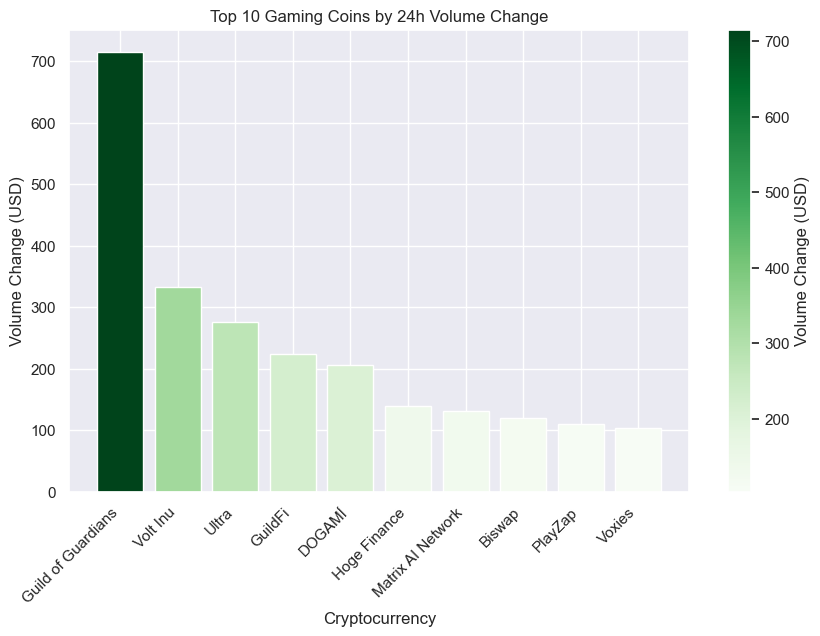

In [164]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Sort the DataFrame by volume change and select the top 10 coins
top_volume_change_gaming_coins = top_volume_change_gaming_coins.sort_values(by='quote.USD.volume_change_24h', ascending=False)

# Set up a colormap and normalize the values
colormap = plt.cm.Greens
normalize = mcolors.Normalize(vmin=top_volume_change_gaming_coins['quote.USD.volume_change_24h'].min(),
                              vmax=top_volume_change_gaming_coins['quote.USD.volume_change_24h'].max())

# Create a bar chart with varying shades of green
plt.figure(figsize=(10, 6))
bars = plt.bar(top_volume_change_gaming_coins['name'],
               top_volume_change_gaming_coins['quote.USD.volume_change_24h'],
               color=colormap(normalize(top_volume_change_gaming_coins['quote.USD.volume_change_24h'])))

# Add a colorbar for reference
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=normalize, cmap=colormap), ax=plt.gca())
cbar.set_label('Volume Change (USD)')

plt.title('Top 10 Gaming Coins by 24h Volume Change')
plt.xlabel('Cryptocurrency')
plt.ylabel('Volume Change (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()


### Making The Charts Interactive

*Please note, you may not actually be able to interact with the chart on your end. This portion is only to display the code used to make the chart interactive*

In [133]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [143]:
import plotly.express as px

# Sort the DataFrame by a relevant column (e.g., 'cmc_rank') in ascending order
filtered_df = filtered_df.sort_values(by='cmc_rank')

# Select the top 10 rows
top_10_df = filtered_df.head(10)

# Create a DataFrame with the necessary columns for the top 10 coins
plot_df = top_10_df[['name'] + time_intervals]

# Melt the DataFrame to have 'name' as the identifier variable
plot_df_melted = plot_df.melt(id_vars='name', var_name='Time Interval', value_name='Value')

# Rename the cryptocurrency names
plot_df_melted['name'] = plot_df_melted['name'].replace(renamed_names)

# Map the time intervals to the corresponding labels
plot_df_melted['Time Interval'] = plot_df_melted['Time Interval'].map(dict(zip(time_intervals, time_labels)))

# Create an interactive line chart with hover information for percent change
fig = px.line(plot_df_melted, x='Time Interval', y='Value', color='name', markers=True,
              labels={'Value': 'Percent Change (%)'},
              title='Top 10 Gaming Cryptocurrency Percent Change Over Time',
              template='plotly_dark', line_shape='linear', hover_data={'Value': ':,.2f'})

# Show the plot
fig.show()


In [152]:
import plotly.express as px

# Fill NaN values in the 'tags' column with an empty string
df['tags'] = df['tags'].fillna('')

# Check if 'gaming' is present in the 'tags' column for each row
mask = df['tags'].astype(str).str.contains('gaming', case=False)

# Apply the mask to filter the DataFrame
filtered_df = df[mask]

# Sort the filtered DataFrame by volume change and select the top 10 coins
top_volume_change_gaming_coins = filtered_df.nlargest(10, 'quote.USD.volume_change_24h')

# Create an interactive bar chart for the top 10 gaming coins by volume change
fig_volume_change_gaming = px.bar(top_volume_change_gaming_coins, x='name', y='quote.USD.volume_change_24h',
                                   title='Top 10 Gaming Coins by 24h Volume Change',
                                   labels={'quote.USD.volume_change_24h': 'Volume Change (USD)'},
                                   color='name')
fig_volume_change_gaming.update_layout(xaxis_title='Cryptocurrency', yaxis_title='Volume Change (USD)')

# Show the interactive chart for gaming coins
fig_volume_change_gaming.show()
